#### Teoría de Circuitos II

# Tarea Semanal 9

#### Por Nahuel Braian Contreras

### Parte I - Diseño de Filtro IIR

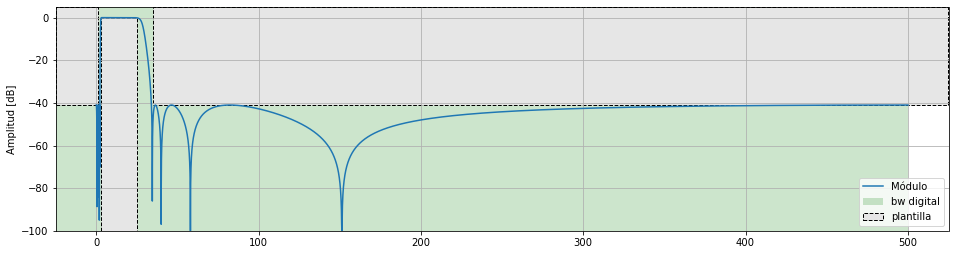

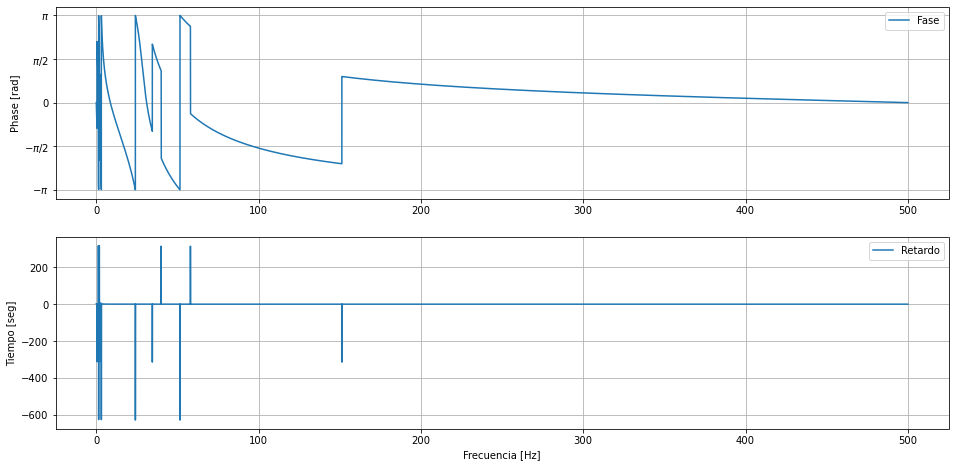

In [18]:
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt
from splane import plot_plantilla

def group_delay(ww, phase):
    
    groupDelay = -np.diff(phase)/np.diff(ww)
    
    return(np.append(groupDelay, groupDelay[-1]))

fs = 1000 # Hz
nyq_frec = fs / 2

ripple = 0.1 # dB
alfa_max = 41 # dB
worN=int(5*10e3)

ws1 = 1.0 #Hz
wp1 = 3.0 #Hz
wp2 = 25.0 #Hz
ws2 = 35.0 #Hz

frecs = np.array([0.0,         ws1,         wp1,     wp2,     ws2,         nyq_frec   ]) / nyq_frec
gains = np.array([-alfa_max, -alfa_max, -ripple, -ripple, -alfa_max, -alfa_max])
gains = 10**(gains/20)

bp_sos_iir = sig.iirdesign([wp1, wp2], [ws1, ws2], ripple, alfa_max, False, 'cheby2', 'sos', fs)

w,h = sig.sosfreqz(bp_sos_iir,worN,False,fs)


group_delay_diff = -np.diff(np.angle(h)) / np.diff(w)
group_d = np.append(group_delay_diff[0],group_delay_diff)


t, y_out = sig.impulse(sig.sos2zpk(bp_sos_iir)) #diverge el impulso

gd = group_delay(w,np.angle(h))

plt.subplot(3, 1, 1)
plt.gcf().set_size_inches(16, 14)
db = 20*np.log10(np.maximum(np.abs(h), 1e-5))
plt.plot(w, db,label='Módulo')
plt.ylabel('Amplitud [dB]')
plt.ylim(-100, 5)
plt.grid(True)
plot_plantilla(filter_type = 'bandpass', fpass = frecs[[2, 3]]* nyq_frec, ripple = ripple , fstop = frecs[ [1, 4] ]* nyq_frec, attenuation = alfa_max, fs = fs)


plt.subplot(3, 1, 2)
plt.gcf().set_size_inches(16, 12)
plt.plot(w, np.angle(h),label='Fase')
plt.yticks([-np.pi, -0.5*np.pi, 0, 0.5*np.pi, np.pi],
            [r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'])
plt.ylabel('Phase [rad]')
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 3)
plt.gcf().set_size_inches(16, 12)
plt.plot(w,group_d,label='Retardo')
plt.ylabel('Tiempo [seg]')
plt.xlabel('Frecuencia [Hz]')
plt.grid(True)
plt.legend()